In [1]:
from sigproc_lib import *

# Victor Moraes - 2016027600
![q1](imgs/q1.png)  



$$ |H(j\omega)|^2 = H(j\omega) . H^* (j\omega)$$
$$ |H(j\omega)|^2 = H(j\omega) . H (-j\omega)$$
$$ js=s$$
$$ |H(s)|^2 = H(s) . H (-s)$$
$$ |H(s)|^2 = {1 \over 1 + (s/\omega_c)^N} . {1 \over 1 - (s/\omega_c)^N}$$
### a) Função de transferência:
$$ |H(s)|^2 = {1 \over 1 + (s/\omega_c)^{2N}}$$
$$ |H(s)|^2 = {1 \over 1 + (s/700.\pi)^{14}}$$
a) Polos:
$$ 1+ (s/\omega_c)^{2N} = 0$$  
$$ (s/\omega_c)^N = (-1)$$
$$ s = \omega_c (-1)^{1/2N}  $$
$$ s = 700\pi(-1)^{1/14}  $$
$$ p_k = -700\pi \angle {2\pi k \over 14},  k \in [0,13]$$



$$ H_n(s) = {1 \over \prod (s - p_k)  } $$
Zeros: não possui zeros do polinômio do numerador.

Calculo de polos:


In [2]:
k=np.arange(0,13)
w = np.complex(imag=2*pi/14)
p = np.exp(w*k)
print(np.round(p,3))
z=[]
k=1

[ 1.   +0.j     0.901+0.434j  0.623+0.782j  0.223+0.975j -0.223+0.975j
 -0.623+0.782j -0.901+0.434j -1.   +0.j    -0.901-0.434j -0.623-0.782j
 -0.223-0.975j  0.223-0.975j  0.623-0.782j]


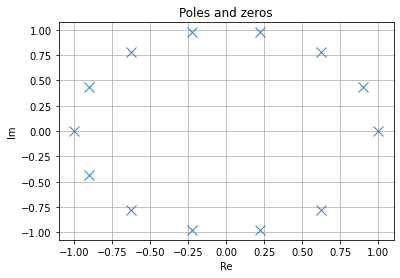

In [3]:
plot_zpk(z,p,k)

Determinação do polinômio de $ H(s) $ a partir de polos do semiplano esquedo:



In [4]:
pb = 700*pi*stable_poles(p)
zb = z
kb = 1/np.abs(tf_zpk(zb,pb,1)(0))
#kb=np.format_float_scientific(kb,precision=2)

#pb = pb.round(2)

print(f"Escalonamento de freqência:\nZeros=\n{zb},\nPolos=\n{np.round(pb)},\nGanho=\n{kb}")


Escalonamento de freqência:
Zeros=
[],
Polos=
[ -489.+2144.j -1371.+1719.j -1981. +954.j -2199.   +0.j -1981. -954.j
 -1371.-1719.j  -489.-2144.j],
Ganho=
2.4873413456829803e+23


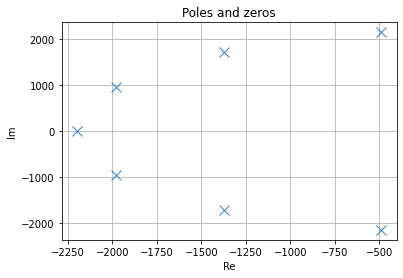

In [5]:
plot_zpk(zb,pb,kb )


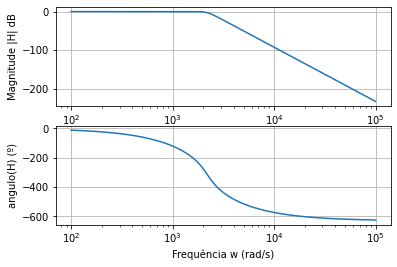

In [6]:
tf_butter = signal.lti(zb,pb,kb )
bode_from_lti(tf_butter,2,5)

In [7]:
#%matplotlib widget
num, dem = zpk2tf(zb,pb,kb )
#plot_surf(num,dem,xrang=[-4000,0],yrang=[-4000,4000],zrang=[0,100],samples=400,angle="degree")



Determinação de $$ H_n(s) $$
Apenas polos do plano negativo utilizando buttap(N):

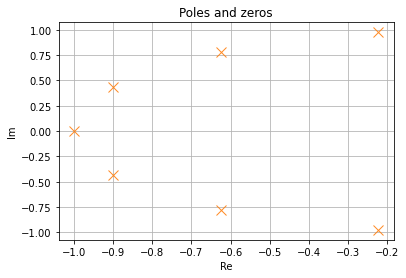

Normalizado:
Zeros=
[],
Polos=
[-0.223+0.975j -0.623+0.782j -0.901+0.434j -1.   -0.j    -0.901-0.434j
 -0.623-0.782j -0.223-0.975j],
Ganho=
1


In [8]:
z,p,k = signal.buttap(7)
plot_zpk(z,p,k)

print(f"""Normalizado:
Zeros=
{z},
Polos=
{np.round(p,3)},
Ganho=
{k}""")


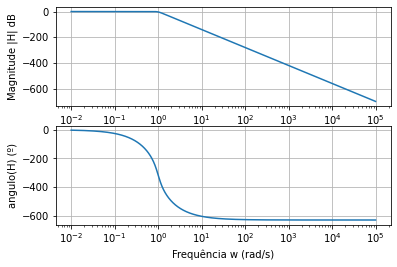

In [9]:
tf_butter = signal.lti(z,p,k )
bode_from_lti(tf_butter,-2,5)

![q3](imgs/q3.png)
![q3](imgs/q3_b.png#center)

$$ n=4,~ \omega_p = 1 ~rad/s, \alpha_p = 60 ~dB $$

$$ \epsilon = { \sqrt{10^{\alpha/10}-1}} \approx 10^3$$
$$ C_n = { 8\omega^5 -8\omega^2 + 1 } $$
$$ \epsilon^2 = { 10^{\alpha/10}-1} = 10^6$$
$$ |H(s)|^2 = { \epsilon^2 *  \over 1 + \epsilon^2 *C^2_3(\omega_s/\omega) }$$
$$ \Omega = \omega_s/ \omega = 1/ \omega$$

$$ |H(s)|^2 = { \epsilon^2 *(8\omega^{-4} -8\omega^{-2} + 1)^2 \over 1 + \epsilon^2 *(8\omega^{-4} -8\omega^{-2} + 1)^2 }$$

$$C^2(\omega) = (8\omega^{-4} -8\omega^{-2} + 1)^2 = 64\omega^{-8} -128\omega^{-6} + 80 \omega^{-4} - 16 \omega^{-2} + 1$$
$$\omega^8 *( 64\omega^{-8} -128\omega^{-6} + 80 \omega^{-4} - 16 \omega^{-2} + 1) = $$
$$ = 64 -128\omega^2 + 80 \omega^4 - 16 \omega^6 + \omega^8$$
$$ s = j\omega$$
$$ \omega = j/s$$
$$C^2(s) = 64 +128s^2 + 80 s^4 + 16 s^6 + s^8$$
$$Numerador = \epsilon^2(64 +128s^2 + 80 s^4 + 16 s^6 + s^8)$$
$$Denominador = s^8 + \epsilon^2(64 +128s^2 + 80 s^4 + 16 s^6 + s^8)$$


In [10]:
np.polymul([8, 0, -8, 0, 1], [8, 0, -8, 0, 1])

array([  64,    0, -128,    0,   80,    0,  -16,    0,    1])

In [11]:
e = 1/999
Cheb_pol = np.array([  1,    0, 16,    0,   80,    0,  128,    0,    64])
num = e**2*Cheb_pol
den = np.polyadd(e**2*Cheb_pol,[1, 0, 0, 0, 0, 0, 0, 0, 0])
pprint(f"Denominador: {den}")
pprint(f"Numerador: {num}")
all_poles = np.roots(den)
all_zeros = np.roots(num)
#plot_zpk(all_zeros,all_poles,1)

('Denominador: [1.00000100e+00 0.00000000e+00 1.60320481e-05 0.00000000e+00\n'
 ' 8.01602403e-05 0.00000000e+00 1.28256385e-04 0.00000000e+00\n'
 ' 6.41281923e-05]')
('Numerador: [1.00200300e-06 0.00000000e+00 1.60320481e-05 0.00000000e+00\n'
 ' 8.01602403e-05 0.00000000e+00 1.28256385e-04 0.00000000e+00\n'
 ' 6.41281923e-05]')


'Zeros: '
array([-4.13236737e-08+2.61312593j, -4.13236737e-08-2.61312593j,
       -1.93719289e-08+1.0823922j , -1.93719289e-08-1.0823922j ])
'Poles:'
[-0.27887415+0.12080023j -0.27887415-0.12080023j -0.10843169+0.27375818j
 -0.10843169-0.27375818j]


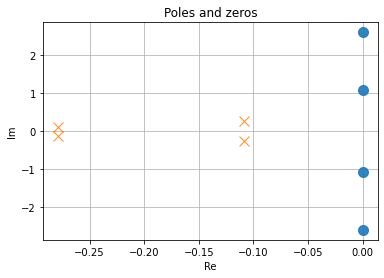

In [12]:
poles_cheb = stable_poles(all_poles)
zeros_cheb = stable_poles(all_zeros)
pprint("Zeros: ")
pprint(zeros_cheb)
pprint("Poles:")
print(poles_cheb)
plot_zpk(zeros_cheb,poles_cheb,1)

In [13]:
num, den = zpk2tf(zeros_cheb,poles_cheb,1)
k = 1 / np.abs(tf(num,den)(0))
num, den = zpk2tf(zeros_cheb,poles_cheb,k)
pprint(f"Num:{np.round(num,4)}")
pprint(f"Dem:{np.round(den,4)}")

'Num:[0.001 0.    0.008 0.    0.008]'
'Dem:[1.     0.7746 0.3    0.0684 0.008 ]'


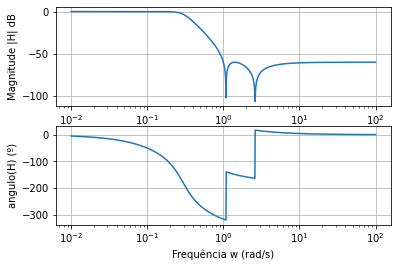

In [14]:
bode_from_tf(num,den,-2,2)

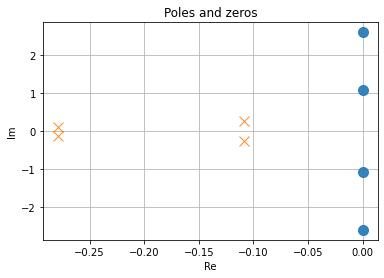

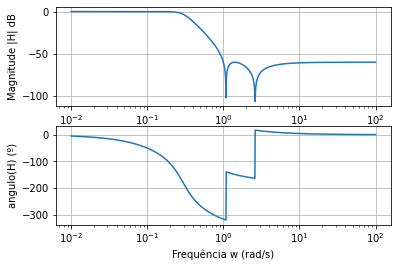

In [15]:
z,p,k = cheby2(N=4,rs=60, Wn=1,btype='low', output='zpk',analog=True)
plot_zpk(z,p,k)
num, den = zpk2tf(zeros_cheb,poles_cheb,k)
bode_from_tf(num,den,-2,2)

Função de transferencia:

$$ T_f = { {0.001 s^4 + 0.008s^2 +0.008} \over {s^4+ 0.7746s^3 0.3s^2    0.0684s 0.008} }$$



As funções de transferências estão condizentes, salvo erro numérico.


![q4](imgs/q4_a.png)
![q4b](imgs/q4_b.png)


Insira a ordem do filtro passa baixas:


Corrected border frequency: 118879.0
TransferFunctionContinuous(
array([1.00000000e-03, 0.00000000e+00, 2.82643138e+07]),
array([1.00000000e+00, 7.51479201e+03, 2.82643138e+07]),
dt: None
)


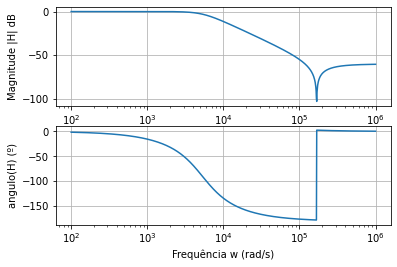


    Zeros=
    [-0.+168119.939j  0.-168119.939j],
    Polos=
    [-3757.396+3761.155j -3757.396-3761.155j],
    Ganho=
    1


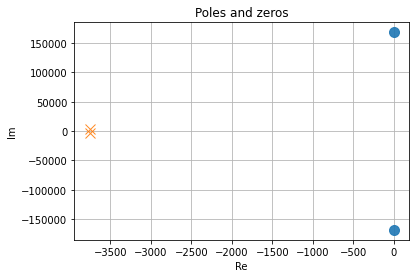

In [7]:
print('Insira a ordem do filtro passa baixas:\n\n')
n=2
#n = int(input())

wp = 1000*pi
Rp = 0.5
Rs = 60

eps = 1/(np.sqrt(10**(Rs/10)-1));

ws = wp*np.cosh((1/n)*np.arccosh(1/(eps*(np.sqrt(10**(Rp/10)-1)))))
print(f"Corrected border frequency: {np.round(ws)}")
num, den = cheby2(n, Rs, ws, analog=True)
tf_cheb = signal.TransferFunction(num,den)
print(tf_cheb)
H = signal.lti(num,den)
bode_from_lti(H,2,6)
z = np.roots(num)
p = np.roots(den)
k=1
display_zpk(z,p,k)
plot_zpk(z,p,k)



TransferFunctionContinuous(
array([1.00000000e-03, 0.00000000e+00, 2.82643138e+07]),
array([1.00000000e+00, 7.51479201e+03, 2.82643138e+07]),
dt: None
)

![q6](imgs/q6.png)


$$ |H(s)|^2 = { 1 \over 1 + \epsilon^2 *(4w^3-3w) }$$
$$$$

![q7](imgs/q7.png)


a) Filtros Ativos permitem ganho maior que 1; possuem caracteristicas de amplificadores ideiais: alta impedância de entrada, baixa impedância de saída, o que permite concatenar vários estágios, sem perda de ganho.

b) Passivos são necessários onde uma a faixa de resposta é muito larga, como em aplicações RF e nanoeletrônica/ processadores, sendo que em ambos a faixa de operação é em GHz. Isso se deve ao fato de amplificadores possuirem uma banda de passagem mais restrita que componentes discretos.

![q8](imgs/q8.png)
![q8_b](imgs/q8_b.png)


In [41]:
wp = 1000*pi
Rp = 2
Rs = 40

eps = 1/(sqrt(10**(Rs/10)-1))
for n in range(1,20):
    Bs = wp*cosh((1/n)*acosh(1/(eps*(sqrt(10**(Rp/10)-1)))))/(2*pi)
    print( f"n={n}, Bs= {Bs}")    
    if Bs < 9e3:
        break
print( f"n={n}")

n=1, Bs= 65374.7445965484
n=2, Bs= 4058.16290322815
n=2
